In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00:00:0100:01
  Attempting unins

In [3]:
import torch
from ultralytics import YOLO
import os
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import zipfile
import shutil
import glob
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory // 1024**2} MB")
else:
    print("GPU not available")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch version: 2.6.0+cu124
CUDA available: True
GPU: Tesla T4
CUDA version: 12.4
GPU Memory: 15095 MB


In [6]:
def check_dataset_structure(base_path='/kaggle/input/dataset'):
    required_paths = [
        f'{base_path}/train/images', f'{base_path}/train/labels',
        f'{base_path}/valid/images', f'{base_path}/valid/labels',
        f'{base_path}/test/images', f'{base_path}/test/labels',
        f'{base_path}/data.yaml'
    ]

    missing = []
    for path in required_paths:
        if not os.path.exists(path):
            missing.append(path)

    if missing:
        print(f"Missing: {missing}")
        return False
    else:
        print("Dataset structure is correct!")
        return True

def analyze_dataset(base_path='/kaggle/input/dataset'):
    train_imgs = len(list(Path(f'{base_path}/train/images').glob('*')))
    train_lbls = len(list(Path(f'{base_path}/train/labels').glob('*')))
    
    valid_imgs = len(list(Path(f'{base_path}/valid/images').glob('*')))
    valid_lbls = len(list(Path(f'{base_path}/valid/labels').glob('*')))
    
    test_imgs = len(list(Path(f'{base_path}/test/images').glob('*')))
    test_lbls = len(list(Path(f'{base_path}/test/labels').glob('*')))

    print("Dataset Statistics:")
    print(f"Train: {train_imgs} images, {train_lbls} labels")
    print(f"Valid: {valid_imgs} images, {valid_lbls} labels")
    print(f"Test: {test_imgs} images, {test_lbls} labels")
    print(f"Total: {train_imgs + valid_imgs + test_imgs} images")

    with open(f'{base_path}/data.yaml', 'r') as f:
        data_config = yaml.safe_load(f)

    print(f"\nClasses: {data_config['names']}")
    print(f"Number of classes: {data_config['nc']}")

    return train_imgs > 0

check_dataset_structure()
analyze_dataset()

Dataset structure is correct!
Dataset Statistics:
Train: 19690 images, 19690 labels
Valid: 777 images, 777 labels
Test: 474 images, 474 labels
Total: 20941 images

Classes: ['phone']
Number of classes: 1


True

In [7]:
config = {
    'data': '/kaggle/input/dataset/data.yaml',
    'epochs': 100,
    'batch': 32,
    'imgsz': 640,
    'device': 0,
    'project': 'smartphone_detection',
    'name': 'kaggle_train',
    'patience': 20,
    'save_period': 10,
    'workers': 2,
}

model = YOLO('yolov8n.pt')

results = model.train(
    data=config['data'],
    epochs=config['epochs'],
    batch=config['batch'],
    imgsz=config['imgsz'],
    device=config['device'],
    project=config['project'],
    name=config['name'],
    patience=config['patience'],
    save_period=config['save_period'],
    workers=config['workers'],
    optimizer='AdamW',
    lr0=0.01,
    lrf=0.1,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    cache=True,
    rect=True,
    cos_lr=True,
    close_mosaic=10,
)

print(f"Best model: {config['project']}/{config['name']}/weights/best.pt")

Ultralytics 8.3.195 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/input/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=kaggle_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretr

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        777       1230      0.773      0.774      0.825      0.675
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /kaggle/working/smartphone_detection/kaggle_train
Best model: smartphone_detection/kaggle_train/weights/best.pt


In [10]:
best_model = YOLO(f"{config['project']}/{config['name']}/weights/best.pt")

test_results = best_model.val(
    data='/kaggle/input/dataset/data.yaml',
    split='test',
    save_json=True,
    conf=0.65,
    iou=0.6,
)

print("Test Results:")
print(f"  mAP50: {test_results.box.map50:.3f}")
print(f"  mAP50-95: {test_results.box.map:.3f}")
print(f"  Precision: {test_results.box.mp:.3f}")
print(f"  Recall: {test_results.box.mr:.3f}")

test_images = list(Path('/kaggle/input/dataset/test/images').glob('*'))[:5]

print(f"\nTesting on {len(test_images)} sample images:")

for img_path in test_images:
    print(f"\nTesting: {img_path.name}")
    results = best_model(str(img_path), conf=0.65, save=True)
    
    if len(results[0].boxes) > 0:
        for box in results[0].boxes:
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            print(f"  Detected smartphone: {conf:.3f} confidence")
    else:
        print(f"  No smartphone detected")

Ultralytics 8.3.195 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 1.4±0.6 ms, read: 30.4±9.8 MB/s, size: 36.3 KB)
val: Scanning /kaggle/input/dataset/test/labels... 474 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 474/474 539.8it/s 0.9s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 56, len(boxes) = 854. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 30/30 7.0it/s 4.3s0.2s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        474        854      0.886      0.521      0.713      0.642
Speed: 0.8ms preprocess, 3.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /kaggle/working/runs/detect/val3/predictions.json...
Results saved to /kaggle/working/runs/detect/val3
Test Results:
  mAP50: 0.713
  mAP50-95: 0.642
  Precision: 0.886
  Recall: 0.521

Testing on 5 sample images:

Testing: Datacluster-Labs-Phone-Dataset-4-_jpg.rf.762b2f9e4428a22ee5e91c60a2f3f6a6.jpg

image 1/1 /kaggle/input/dataset/test/images/Datacluster-Labs-Phone-Dataset-4-_jpg.rf.762b2f9e4428a22ee5e91c60a2f3f6a6.jpg: 640x640 1 phone, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/detect/predict
  Detected smartphone: 0.710 confidence

Testing: 0019823889__5274714__M_640_640_jpg.rf.2305ee48aa87926c9081ec09dff8ce48.jpg

image 1/1 /kaggle/input/dataset/test/images/0019823889__5274714__M_640_640_jpg.rf.2305ee48aa87926c

Training Results:


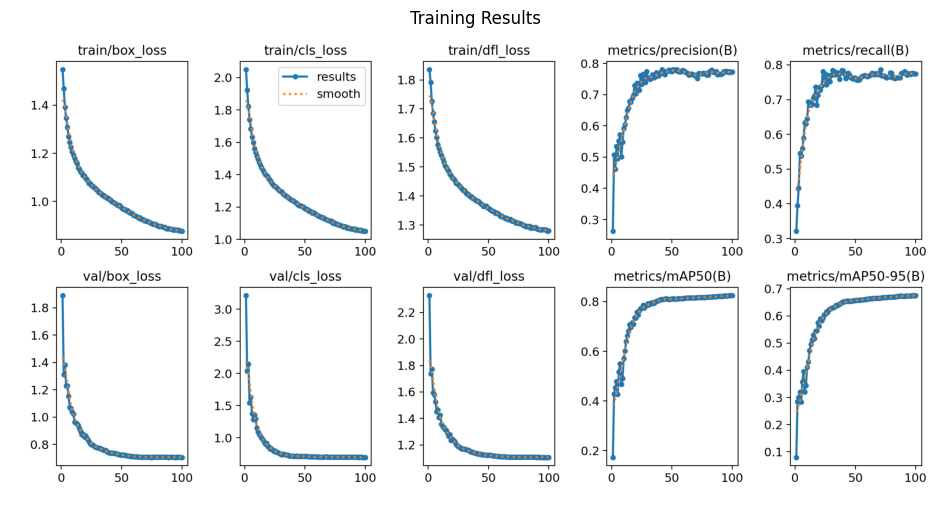


Confusion Matrix:


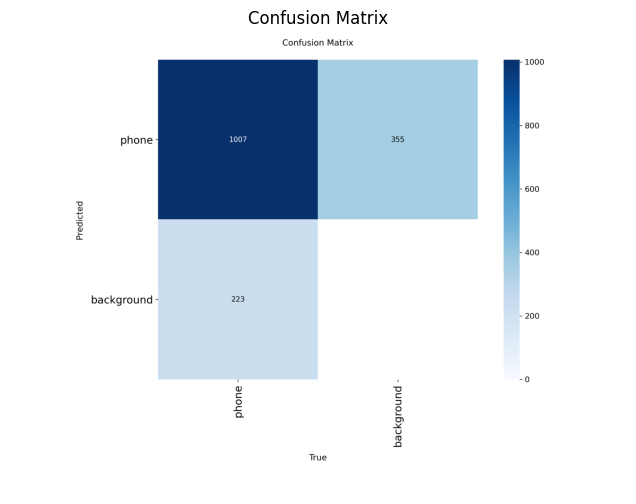


Sample Predictions:


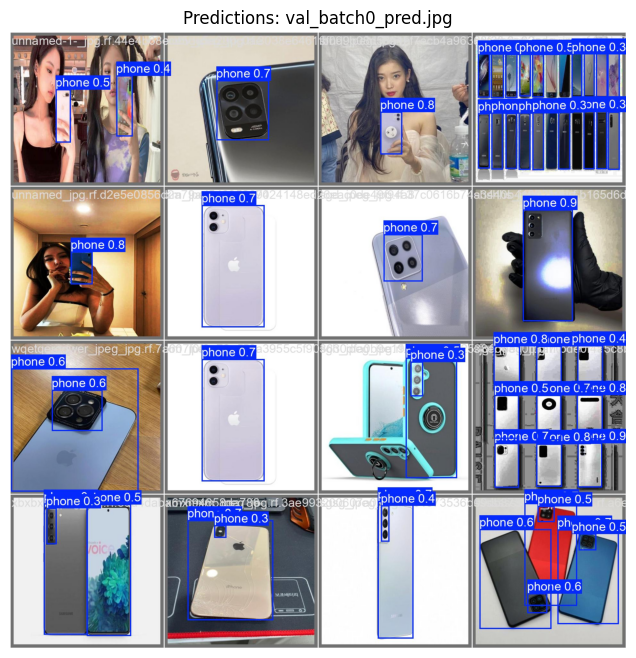

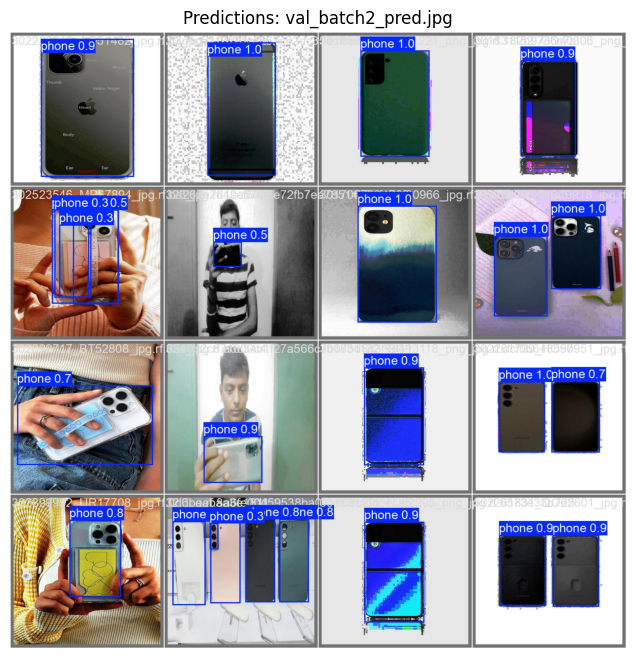

In [11]:
results_dir = f"{config['project']}/{config['name']}"

if os.path.exists(f'{results_dir}/results.png'):
    print("Training Results:")
    img = plt.imread(f'{results_dir}/results.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Training Results')
    plt.show()

if os.path.exists(f'{results_dir}/confusion_matrix.png'):
    print("\nConfusion Matrix:")
    img = plt.imread(f'{results_dir}/confusion_matrix.png')
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Confusion Matrix')
    plt.show()

pred_images = glob.glob(f'{results_dir}/val_batch*_pred.jpg')
if pred_images:
    print(f"\nSample Predictions:")
    for img_path in pred_images[:2]:
        img = plt.imread(img_path)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Predictions: {os.path.basename(img_path)}')
        plt.show()

In [12]:
shutil.make_archive('smartphone_model', 'zip', results_dir)

print("Model saved!")
print("Files created:")
print(f"  - smartphone_model.zip (complete results)")
print(f"  - {results_dir}/weights/best.pt (trained model)")

Model saved!
Files created:
  - smartphone_model.zip (complete results)
  - smartphone_detection/kaggle_train/weights/best.pt (trained model)
